###Modelagem de dois tanques sem tubulação
Videos:  
https://www.youtube.com/watch?v=93SO_fxNIcA

 https://www.youtube.com/watch?v=tNQSQ2jMBN0

Equações:  
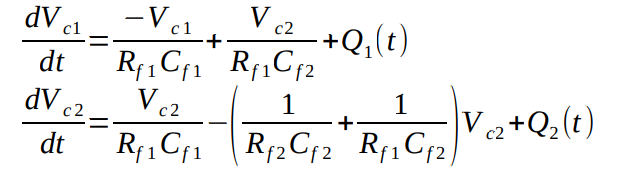

Valores:  
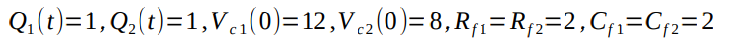

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def dVc1dt(t, Vc1, Vc2, Rf1, Rf2, Cf1, Cf2, q1):
  resultado1 = -Vc1 / (Rf1 * Cf1) + Vc2 / (Rf1 * Cf2) + q1
  return resultado1

def dVc2dt(t, Vc1, Vc2, Rf1, Rf2, Cf1, Cf2, q2):
  resultado2 = Vc2 / (Rf1 * Cf1) - Vc2 * (1 / (Rf2 * Cf2) + 1 / (Rf1 * Cf1)) + q2
  return resultado2

In [3]:
q1 = 1
q2 = 1

Vc1 = 12
Vc2 = 8

Rf1 = 2
Rf2 = 2

Cf1 = 2
Cf2 = 2

t0 = 0
tn = 50
n = 1000

#dividindo o tempo em intervalos [x0, xn]
tempo = np.linspace(t0, tn, n+1) #intervalo [0, 2]
h = (tempo[n] - tempo[0]) / n

#Listas para guardar os valores para os gráficos
valores_Vc1 = []
valores_Vc2 = []

In [4]:
#Calculando a evolução das variáveis
for t in tempo:
  #Guardando os valores de cada iteração
  valores_Vc1.append(Vc1)
  valores_Vc2.append(Vc2)

  #Calculando K1
  k1Vc1 = dVc1dt(t, Vc1, Vc2, Rf1, Rf2, Cf1, Cf2, q1)
  k1Vc2 = dVc2dt(t, Vc1, Vc2, Rf1, Rf2, Cf1, Cf2, q2)

  #Calculando K2
  k2Vc1 = dVc1dt(t + h/2, Vc1 + k1Vc1 * h/2, Vc2 + k1Vc2 * h/2, Rf1, Rf2, Cf1, Cf2, q1)
  k2Vc2 = dVc2dt(t + h/2, Vc1 + k1Vc1 * h/2, Vc2 + k1Vc2 * h/2, Rf1, Rf2, Cf1, Cf2, q2)

  #Calculando K3
  k3Vc1 = dVc1dt(t + h/2, Vc1 + k2Vc1 * h/2, Vc2 + k2Vc2 * h/2, Rf1, Rf2, Cf1, Cf2, q1)
  k3Vc2 = dVc2dt(t + h/2, Vc1 + k2Vc1 * h/2, Vc2 + k2Vc2 * h/2, Rf1, Rf2, Cf1, Cf2, q2)

  #Calculando K4
  k4Vc1 = dVc1dt(t + h, Vc1 + k3Vc1 * h, Vc2 + k3Vc2 * h, Rf1, Rf2, Cf1, Cf2, q1)
  k4Vc2 = dVc2dt(t + h, Vc1 + k3Vc1 * h, Vc2 + k3Vc2 * h, Rf1, Rf2, Cf1, Cf2, q2)

  #Novos Vc1 e Vc2
  novoVc1 = Vc1 + h/6 * (k1Vc1 + 2 * k2Vc1 + 2 * k3Vc1 + k4Vc1)
  novoVc2 = Vc2 + h/6 * (k1Vc2 + 2 * k2Vc2 + 2 * k3Vc2 + k4Vc2)

  #Atualizando os valores para a próxima iteração
  Vc1 = novoVc1
  Vc2 = novoVc2

In [5]:
tabela = pd.DataFrame({'t': tempo,'Vc1': valores_Vc1, 'Vc2': valores_Vc2})
tabela

,t,Vc1,Vc2
0,0.00,12.000000,8.000000
1,0.05,11.999690,7.950311
2,0.10,11.998771,7.901240
3,0.15,11.997257,7.852778
4,0.20,11.995164,7.804918
...,...,...,...
996,49.80,8.000211,4.000016
997,49.85,8.000208,4.000015
998,49.90,8.000206,4.000015
999,49.95,8.000204,4.000015


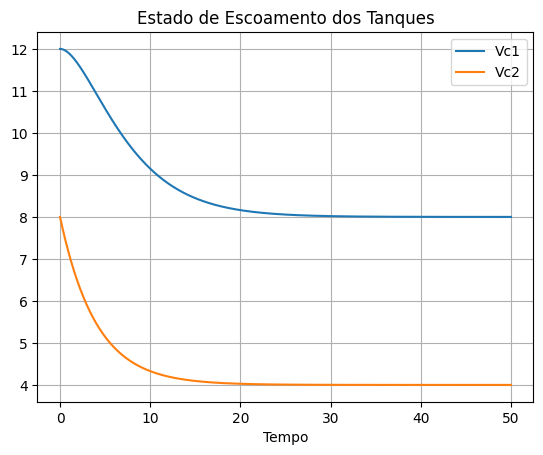

In [6]:
plt.plot(tempo, valores_Vc1, label = 'Vc1')
plt.plot(tempo, valores_Vc2, label = 'Vc2')
plt.xlabel('Tempo')
plt.title('Estado de Escoamento dos Tanques')
plt.grid()
plt.legend()
plt.show()